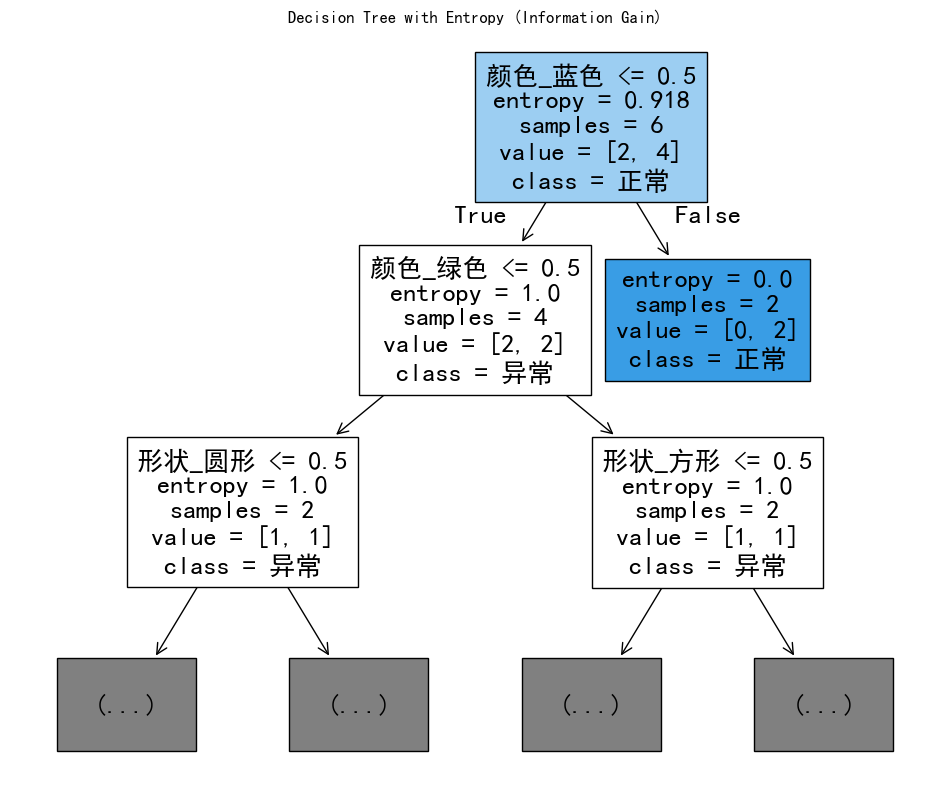

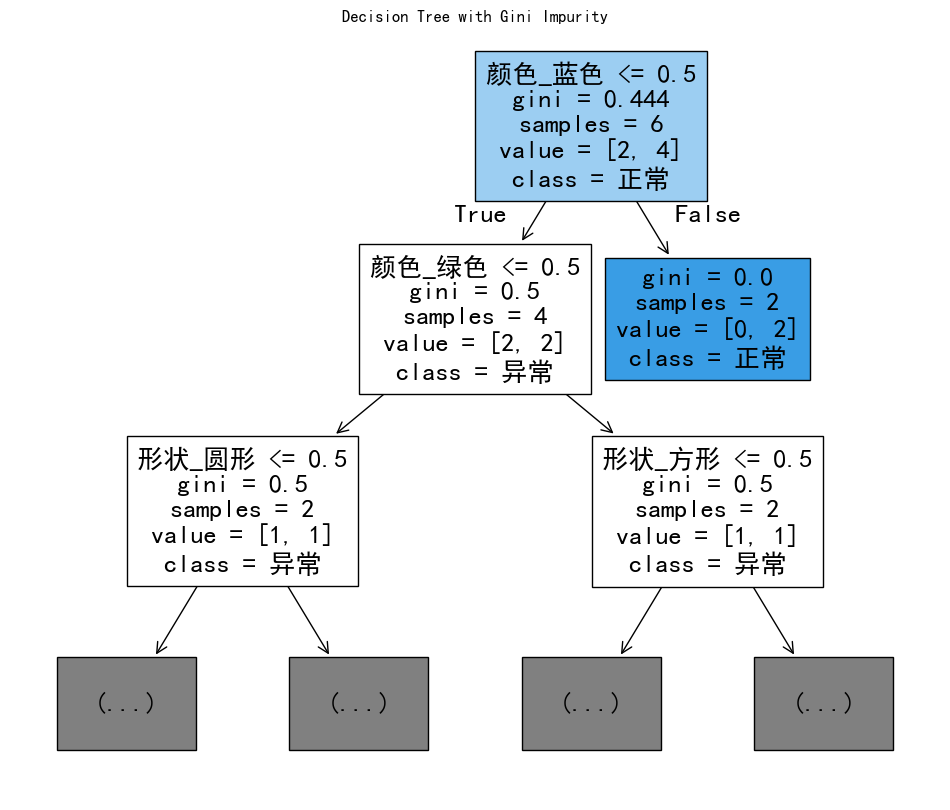

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体为支持中文的字体（比如 SimHei）
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False  # 防止负号显示为方块
# 创建数据集
data = {'颜色': ['红色', '红色', '蓝色', '蓝色', '绿色', '绿色'],
        '形状': ['圆形', '方形', '圆形', '方形', '圆形', '方形'],
        '标签': ['正常', '异常', '正常', '正常', '异常', '正常']}

df = pd.DataFrame(data)

# 将目标变量标签转换为二进制形式
df['标签'] = df['标签'].map({'正常': 1, '异常': 0})

# 特征和标签
X = df[['颜色', '形状']]
y = df['标签']

# 将分类特征转换为数字
X = pd.get_dummies(X)

# 训练决策树（信息增益）
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X, y)

# 训练决策树（基尼不纯度）
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X, y)

# 可视化树结构
plt.figure(figsize=(12, 10))
plot_tree(tree_entropy, filled=True, feature_names=X.columns, class_names=['异常', '正常'], max_depth=2)
plt.title("Decision Tree with Entropy (Information Gain)")
plt.show()

plt.figure(figsize=(12, 10))
plot_tree(tree_gini, filled=True, feature_names=X.columns, class_names=['异常', '正常'], max_depth=2)
plt.title("Decision Tree with Gini Impurity")
plt.show()
